# Introduction

Dear O'Reilly Team,

  Thanks for taking the time to look at my ml take home. The project was very intersting and insightful. 

#  Importing Data and Preprocessing
   

In [12]:
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline  
%config InlineBackend.figure_format = 'svg'
warnings.filterwarnings('ignore')

In [154]:
#Importing Data and assigning columns names to columns.
df = pd.read_csv('C:/Users/srv30/AppData/Local/Continuum/anaconda3/sampled_training.csv', header=None)
df.columns = ['id', 'click', 'date', 'C1', 'banner_pos', 'site_id','site_domain', 'site_category', 'app_id', 'app_domain','app_category', 
'device_id', 'device_ip','device_model', 'device_type', 'device_conn_type', 'C14', 'C15', 'C16', 'C17', 'C18', 'C19', 'C20', 'C21']

df.head()

,id,click,date,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,...,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21
0,10002028568167339219,0,14102100,1005,0,9e8cf15d,0d3cb7be,f028772b,ecad2386,7801e8d9,...,1,2,20596,320,50,2161,0,35,100148,157
1,10006958186789044052,1,14102100,1005,0,85f751fd,c4e18dd6,50e219e0,0acbeaa3,45a51db4,...,1,0,18993,320,50,2161,0,35,100034,157
2,10011650513707909570,0,14102100,1005,0,85f751fd,c4e18dd6,50e219e0,febd1138,82e27996,...,1,0,21611,320,50,2480,3,297,100111,61
3,10022961149355219548,0,14102100,1005,0,85f751fd,c4e18dd6,50e219e0,e2fcccd2,5c5a694b,...,1,0,4687,320,50,423,2,39,100148,32
4,10029289556764215760,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,2,15706,320,50,1722,0,35,100084,79


In [4]:
# Data dimensionality.
print(df.shape)

(843502, 24)


In [155]:
#Before further analysis let's convert date feature to a format that is usable.
df['date'] = pd.to_datetime(df['date'], format = '%y%m%d%H')
df['year']=df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df['hour'] = df['date'].dt.hour
df['minute'] = df['date'].dt.minute
df=df.drop(['date'], axis=1);

In [6]:
df.head()

,id,click,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,app_category,...,C17,C18,C19,C20,C21,year,month,day,hour,minute
0,10002028568167339219,0,1005,0,9e8cf15d,0d3cb7be,f028772b,ecad2386,7801e8d9,07d7df22,...,2161,0,35,100148,157,2014,10,21,0,0
1,10006958186789044052,1,1005,0,85f751fd,c4e18dd6,50e219e0,0acbeaa3,45a51db4,f95efa07,...,2161,0,35,100034,157,2014,10,21,0,0
2,10011650513707909570,0,1005,0,85f751fd,c4e18dd6,50e219e0,febd1138,82e27996,0f2161f8,...,2480,3,297,100111,61,2014,10,21,0,0
3,10022961149355219548,0,1005,0,85f751fd,c4e18dd6,50e219e0,e2fcccd2,5c5a694b,0f2161f8,...,423,2,39,100148,32,2014,10,21,0,0
4,10029289556764215760,0,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,...,1722,0,35,100084,79,2014,10,21,0,0


#  Exploratory Analysis

In [7]:
# Some basic information about the data.
# 9 features are of type object.
# 19 features are of numeric. 
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 843502 entries, 0 to 843501
Data columns (total 28 columns):
id                  843502 non-null uint64
click               843502 non-null int64
C1                  843502 non-null int64
banner_pos          843502 non-null int64
site_id             843502 non-null object
site_domain         843502 non-null object
site_category       843502 non-null object
app_id              843502 non-null object
app_domain          843502 non-null object
app_category        843502 non-null object
device_id           843502 non-null object
device_ip           843502 non-null object
device_model        843502 non-null object
device_type         843502 non-null int64
device_conn_type    843502 non-null int64
C14                 843502 non-null int64
C15                 843502 non-null int64
C16                 843502 non-null int64
C17                 843502 non-null int64
C18                 843502 non-null int64
C19                 843502 non-null int

In [8]:
# Basic statistical characteristics of each numerical feature.
df.describe()

,id,click,C1,banner_pos,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21,year,month,day,hour,minute
count,8.435020e+05,843502.000000,843502.000000,843502.000000,843502.000000,843502.000000,843502.000000,843502.000000,843502.000000,843502.000000,843502.000000,843502.000000,843502.000000,843502.000000,843502.0,843502.0,843502.000000,843502.000000,843502.0
mean,9.231625e+18,0.170271,1004.959553,0.293501,1.016934,0.330417,18560.262501,318.861537,60.286297,2077.663483,1.443956,217.741979,54155.776171,79.551913,2014.0,10.0,24.898989,11.230468,0.0
std,5.325619e+18,0.375871,1.132949,0.515961,0.553377,0.854515,5007.778987,21.730624,47.965820,610.749820,1.323114,342.722108,49887.241496,66.999613,0.0,0.0,2.679826,5.996031,0.0
min,1.308118e+13,0.000000,1001.000000,0.000000,0.000000,0.000000,375.000000,120.000000,20.000000,112.000000,0.000000,33.000000,-1.000000,1.000000,2014.0,10.0,21.000000,0.000000,0.0
25%,4.622961e+18,0.000000,1005.000000,0.000000,1.000000,0.000000,16688.000000,320.000000,50.000000,1800.000000,0.000000,35.000000,-1.000000,23.000000,2014.0,10.0,22.000000,6.000000,0.0
50%,9.238306e+18,0.000000,1005.000000,0.000000,1.000000,0.000000,20108.000000,320.000000,50.000000,2295.000000,2.000000,39.000000,100057.000000,52.000000,2014.0,10.0,25.000000,11.000000,0.0
75%,1.384568e+19,0.000000,1005.000000,1.000000,1.000000,0.000000,21768.000000,320.000000,50.000000,2506.000000,3.000000,167.000000,100084.000000,91.000000,2014.0,10.0,27.000000,16.000000,0.0
max,1.844669e+19,1.000000,1012.000000,7.000000,5.000000,5.000000,23836.000000,1024.000000,1024.000000,2729.000000,3.000000,1839.000000,100248.000000,253.000000,2014.0,10.0,30.000000,23.000000,0.0


In [9]:
# Statistics on Non-Numeric Features
# From the statistics we observe most variables have a large number of unique features. 
# We will have to consider this when decided how to deal with them in our model to reduce model complexity. 
df.describe(include=['object', 'bool'])

,site_id,site_domain,site_category,app_id,app_domain,app_category,device_id,device_ip,device_model
count,843502,843502,843502,843502,843502,843502,843502,843502,843502
unique,2366,2506,21,2211,156,28,78975,153806,4415
top,85f751fd,c4e18dd6,50e219e0,ecad2386,7801e8d9,07d7df22,a99f214a,699f69bd,8a4875bd
freq,294815,306511,339610,548687,580117,556049,688380,13341,50208


In [10]:
# Distribution of Click
# Data is slighlty imbalanced. 
# We will have to address this when we model and decide on a performance metric since ML algorithms suffer from frequency bias.
print(df['click'].value_counts())
print(df['click'].value_counts(normalize=True))

0    699878
1    143624
Name: click, dtype: int64
0    0.829729
1    0.170271
Name: click, dtype: float64


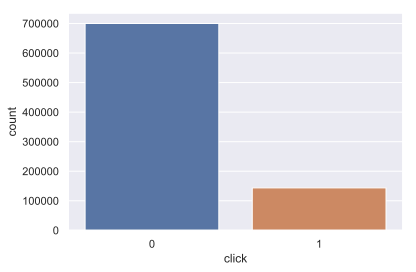

In [13]:
sns.countplot(x='click', data=df);

In [28]:
# For interest sake let's find the average values of the numerical features of users that clicked.
df[df['click'] == 1].mean()

id                  9.219244e+18
click               1.000000e+00
hour                1.410250e+07
C1                  1.004847e+03
banner_pos          3.270345e-01
device_type         9.656882e-01
device_conn_type    1.702849e-01
C14                 1.787548e+04
C15                 3.172567e+02
C16                 7.445008e+01
C17                 2.000112e+03
C18                 1.544742e+00
C19                 2.196372e+02
C20                 4.846321e+04
C21                 6.859964e+01
dtype: float64

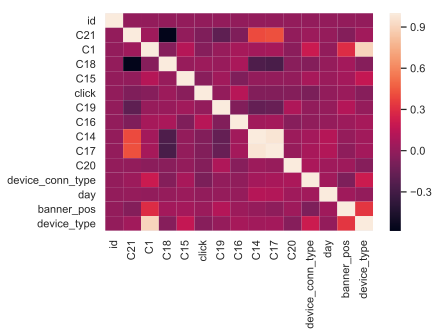

In [14]:
# Visual data analysis to gain some further information
# Drop non-numerical variables
# From the plots we see that C1 and device_type are highly correlated.
# We also observe high correlation between variables C14 and C17.
numerical = list(set(df.columns) - 
set(['site_id','site_domain','hour','year','month','minute','site_category','app_id','app_domain','app_category','device_id','device_ip','device_model']))

# Calculate and plot
corr_matrix = df[numerical].corr()
sns.heatmap(corr_matrix);

In [15]:
# Let's take a closer look at these variables.
# We observe a high correlation coefficient(> 0.90) on the set of variables indicating they are highly correlated.
# We will have to decide if it is warranted keeping them in our final set of variables.
print(np.corrcoef(df['C1'], df['device_type']))
print(np.corrcoef(df['C14'], df['C17']))

[[1.         0.90702242]
 [0.90702242 1.        ]]
[[1.       0.974478]
 [0.974478 1.      ]]


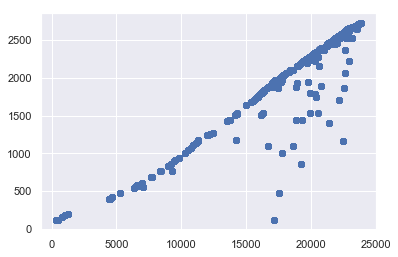

In [19]:
# Let's take a look at the scatterplot of the highly correlated variables
# From the plot we observe most of the data fall on a straight line as suggested by the high correlation. 
plt.scatter(df['C14'], df['C17']);


In [22]:
print(df['C1'].value_counts())
print(df['device_type'].value_counts())

1005    768532
1002     50958
1010     20759
1012      1986
1007       830
1001       273
1008       164
Name: C1, dtype: int64
1    771785
0     50958
4     17794
5      2965
Name: device_type, dtype: int64


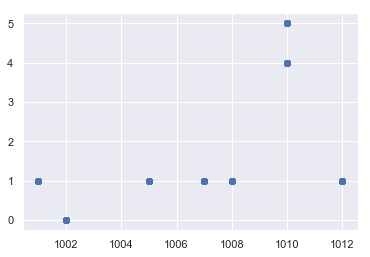

In [24]:
#Due to the infrequent occurrence of values the scatterplot between C1 and device_type is not as useful.
plt.scatter(df['C1'], df['device_type']);

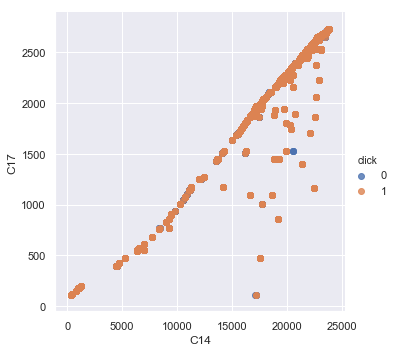

In [25]:
# Let's see how the correlated variables are related to the target variable click.
# From the lmplot we see again the variables are given us the same information
sns.lmplot('C14', 'C17', data=df, hue='click', fit_reg=False);

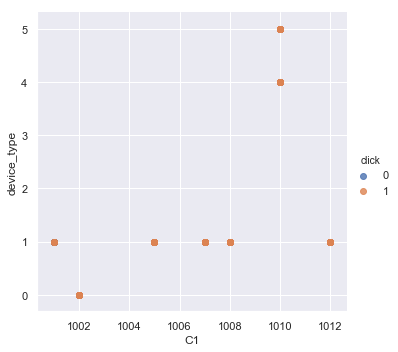

In [26]:
# Although the scatterplot was not informative in displaying the relationship between the variables
# We see lmplot that the two variables are interacting with the targer the same.
sns.lmplot('C1', 'device_type', data=df, hue='click', fit_reg=False);

#  Model Building

In [188]:
# Split training data
X_train=df.drop(['click','id'], axis=1);
Y_train=df['click']

In [189]:
# Lets factorize the features since we are interested in the distinct values of the features.
columns=list(X_train)
for i in columns:
        X_train[i] = pd.factorize(X_train[i])[0]

print(X_train.info())    

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 843502 entries, 0 to 843501
Data columns (total 26 columns):
C1                  843502 non-null int64
banner_pos          843502 non-null int64
site_id             843502 non-null int64
site_domain         843502 non-null int64
site_category       843502 non-null int64
app_id              843502 non-null int64
app_domain          843502 non-null int64
app_category        843502 non-null int64
device_id           843502 non-null int64
device_ip           843502 non-null int64
device_model        843502 non-null int64
device_type         843502 non-null int64
device_conn_type    843502 non-null int64
C14                 843502 non-null int64
C15                 843502 non-null int64
C16                 843502 non-null int64
C17                 843502 non-null int64
C18                 843502 non-null int64
C19                 843502 non-null int64
C20                 843502 non-null int64
C21                 843502 non-null int64
year   

In [163]:
# Let's split the training data into train and test set to gain some further metrics
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X_train, Y_train, random_state = 42, test_size = 0.2)

In [164]:
x_test.head()

,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,app_category,device_id,device_ip,...,C17,C18,C19,C20,C21,year,month,day,hour,minute
770595,1,0,148,2434,1,0,0,0,70927,1065,...,346,2,32,4,11,0,0,8,4,0
733265,0,0,61,53,0,0,0,0,0,136222,...,15,0,54,4,9,0,0,7,18,0
716636,1,0,20,1,1,0,0,0,66808,134070,...,341,0,0,14,34,0,0,7,15,0
755752,0,1,3,3,0,0,0,0,0,2894,...,19,1,2,4,5,0,0,8,0,0
330238,0,1,128,65,0,0,0,0,0,5954,...,15,0,34,23,9,0,0,3,4,0


In [81]:
# Since the data exhibits some class imbalance let's add class weights and select the balanced option.
# Also focus on the f1-score as the scoring metric.
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
forest_clf= RandomForestClassifier(n_estimators=100, criterion='gini',class_weight='balanced', random_state=42)
cross_val_score(forest_clf, x_train, y_train, cv=5, scoring='f1')

array([0.29834892, 0.29955286, 0.29451857, 0.29528185, 0.29662947])

In [82]:
#Train model
from sklearn import metrics
forest_clf.fit(x_train, y_train)
y_predict = forest_clf.predict(x_test)

In [83]:
# Let's take a look at some metrics for our model.
from sklearn import metrics
print(metrics.classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.86      0.94      0.90    140113
           1       0.45      0.23      0.30     28588

   micro avg       0.82      0.82      0.82    168701
   macro avg       0.65      0.59      0.60    168701
weighted avg       0.79      0.82      0.80    168701



In [87]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict

y_predict=cross_val_predict(forest_clf, x_train, y_train, cv=5)
confusion_matrix(y_train,y_predict)

array([[528394,  31371],
       [ 90584,  24452]], dtype=int64)

In [103]:
# A good tool when looking at binary classifiers is the ROC Curve.
from sklearn.metrics import roc_curve
y_probas_forest=cross_val_predict(forest_clf, x_train, y_train,cv=5, method="predict_proba")

In [104]:
y_scores_forest = y_probas_forest[:, 1]
fpr, tpr, thresholds = roc_curve(y_train, y_scores_forest)

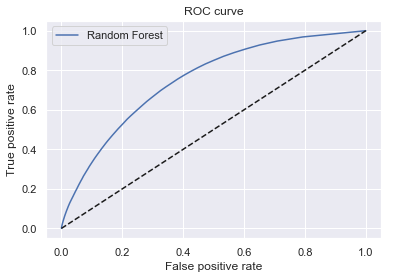

In [106]:
plt.plot(fpr, tpr, label='Random Forest')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

In [107]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train, y_scores_forest)

0.7494874147556806

In [169]:
# For the sake of completeness let's see if the results are different if we remove correlated features
X_train=df.drop(['click','C1','C14','id'], axis=1);

In [170]:
# Let's split the training data into train and test set to gain some further metrics
from sklearn.model_selection import train_test_split

columns=list(X_train)
for i in columns:
        X_train[i] = pd.factorize(X_train[i])[0]
x_train, x_test, y_train, y_test = train_test_split(X_train, Y_train, random_state = 42, test_size = 0.2)

In [125]:
#Train model
from sklearn import metrics
forest_clf.fit(x_train, y_train)
y_predict = forest_clf.predict(x_test)

In [126]:
# Let's take a look at some metrics for our model.
from sklearn import metrics
print(metrics.classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.87      0.89      0.88    140113
           1       0.41      0.37      0.39     28588

   micro avg       0.80      0.80      0.80    168701
   macro avg       0.64      0.63      0.64    168701
weighted avg       0.80      0.80      0.80    168701



In [127]:
from sklearn.metrics import roc_curve
y_probas_forest=cross_val_predict(forest_clf, x_train, y_train,cv=5, method="predict_proba")

In [128]:
y_scores_forest = y_probas_forest[:, 1]
fpr, tpr, thresholds = roc_curve(y_train, y_scores_forest)

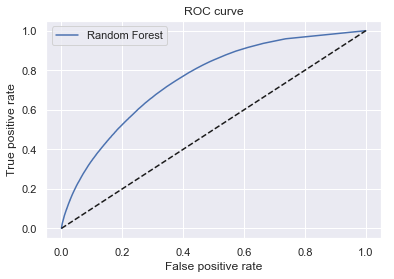

In [129]:
plt.plot(fpr, tpr, label='Random Forest')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

In [130]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train, y_scores_forest)

0.7517126012344111

     Training the model without the highly correlated features gives no meaningful change in the model.
     Therefore, we will remove these features.

Text(0.5, 0, 'Relative Importance')

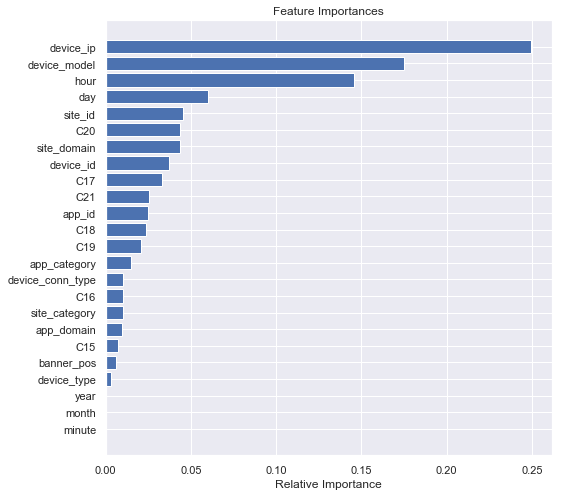

In [239]:
# Let's take a look at the most important features of the model.
# From the graph we observe device_ip is the feature with the greatest importance.
features = x_train.columns
importances = forest_clf.feature_importances_
indices = np.argsort(importances)
fig, ax = plt.subplots(figsize=(8, 8))
plt.figure(1)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')

In [135]:
# Due to time limitation. Let's just run one more model for comparison.
from sklearn.ensemble import GradientBoostingClassifier
GBC_clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=0).fit(x_train, y_train)
cross_val_score(GBC_clf, x_train, y_train, cv=5, scoring='f1')

array([0.09872674, 0.08987337, 0.07850034, 0.07573011, 0.08418043])

In [136]:
from sklearn import metrics
GBC_clf.fit(x_train, y_train)
y_predict = GBC_clf.predict(x_test)

In [137]:
from sklearn import metrics
print(metrics.classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.84      0.99      0.91    140113
           1       0.48      0.05      0.08     28588

   micro avg       0.83      0.83      0.83    168701
   macro avg       0.66      0.52      0.50    168701
weighted avg       0.77      0.83      0.77    168701



In [138]:
from sklearn.metrics import roc_curve
y_probas_GBC=cross_val_predict(GBC_clf, x_train, y_train,cv=5, method="predict_proba")

In [143]:
y_scores_GBC = y_probas_GBC[:, 1]
fpr, tpr, thresholds = roc_curve(y_train, y_scores_GBC)

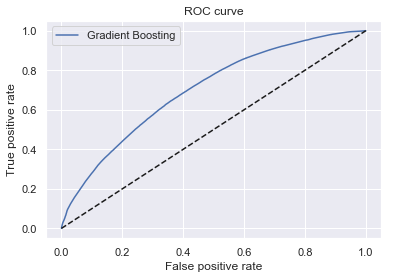

In [144]:
plt.plot(fpr, tpr, label='Gradient Boosting')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

In [145]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train, y_scores_GBC)

0.7004194406756011

# Summary
 Based on our analysis we conclude that removing the features that are correlated did not change the outcome from the random
 forest model. Furthermore, we observed the feature that was the most important is the device_ip. 
 In addition,the random forest model performed marginally better than the alternative Gradient Boosting Classifier when judged using the AUC Metric. 
 Likewise, when we look at the f1-score of both models the Random Forest again outperforms the Gradient Boosting Classifier.     The AUC score for the baseline Random Forest Classifier of 0.75 indicates there is room for improvement. 
 Specifically, improvement in our model by tunning the hyperparameters is an approach that should be explored. 
 In addition, it is possible that performance gains can be made if another method to balance the classes are used. In our model,
 the method of balancing classes that was used is the one provided by the Random Forest Classifier.

# Predicting Test Data

In [241]:
df_test = pd.read_csv('C:/Users/srv30/AppData/Local/Continuum/anaconda3/sampled_test.csv', header=None)
df_test.columns = ['id', 'date', 'C1', 'banner_pos', 'site_id','site_domain', 'site_category', 'app_id', 'app_domain','app_category', 
'device_id', 'device_ip','device_model', 'device_type', 'device_conn_type', 'C14', 'C15', 'C16', 'C17', 'C18', 'C19', 'C20', 'C21']


In [242]:
df_test['date'] = pd.to_datetime(df_test['date'], format = '%y%m%d%H')
df_test['year']=df_test['date'].dt.year
df_test['month'] = df_test['date'].dt.month
df_test['day'] = df_test['date'].dt.day
df_test['hour'] = df_test['date'].dt.hour
df_test['minute'] = df_test['date'].dt.minute
df_test=df_test.drop(['date'], axis=1);

df_test=df_test.drop(['C1','C14','id'], axis=1);

columns_test=list(df_test)
for i in columns_test:
        df_test[i] = pd.factorize(df_test[i])[0]


In [199]:
click_probab=forest_clf.predict_proba(df_test)
dataset = pd.DataFrame({'Column1':data[:,0],'Column2':data[:,1]})

In [212]:
click_probab=pd.DataFrame(click_probab[1])

In [213]:
click_probab.to_csv("Click_Predictions.csv")


In [215]:
# The average likelihood for a click is 0.19 a value that closely matches the proportions of clicks in the training data set.
click_probab.mean()

1    0.192029
dtype: float64